In [26]:
import pandas as pd
import matplotlib.pyplot as plt 
import numpy as np 
import seaborn as sns
import kaggle
import zipfile
import mysql.connector



In [28]:
import kaggle 
!kaggle datasets download tamsnd/adidas-webstore-shoe-data -f country_dim.csv
!kaggle datasets download tamsnd/adidas-webstore-shoe-data -f shoes_dim.csv
!kaggle datasets download tamsnd/adidas-webstore-shoe-data -f shoes_fact.csv




Dataset URL: https://www.kaggle.com/datasets/tamsnd/adidas-webstore-shoe-data
License(s): CC0-1.0
country_dim.csv: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/tamsnd/adidas-webstore-shoe-data
License(s): CC0-1.0
shoes_dim.csv: Skipping, found more recently modified local copy (use --force to force download)
Dataset URL: https://www.kaggle.com/datasets/tamsnd/adidas-webstore-shoe-data
License(s): CC0-1.0
shoes_fact.csv: Skipping, found more recently modified local copy (use --force to force download)


In [30]:
#upload to sql
from sqlalchemy import create_engine
import pandas as pd

username = 'root'
password = '*********'
host = '127.0.0.1'
port = '3306'
database = 'adidas_show_data'
engine = create_engine(f'mysql+pymysql://{username}:{password}@{host}:{port}/{database}')

df_country_dim = pd.read_csv('country_dim.csv')
df_shoes_dim = pd.read_csv('shoes_dim.csv')
df_shoes_fact = pd.read_csv('shoes_fact.csv')

df_country_dim.to_sql('country_dim', con = engine, if_exists = 'replace', index = False)
df_shoes_dim.to_sql('shoes_dim',con = engine, if_exists = 'replace', index = False)
df_shoes_fact.to_sql('shoes_fact',con = engine, if_exists = 'replace', index = False)

engine.dispose()

In [31]:
df_shoes_fact.head()
df_shoes_fact.rename(columns={'Unnamed: 0':'order_number'}, inplace = True)

In [33]:
df_country_dim

,country_code,currency,shoe_metric
0,DE,euro,eu
1,US,usd,usa
2,BE,euro,eu
3,UK,pounds,uk


In [34]:
df_shoes_dim

,id,name,best_for_wear,gender,image_url,dominant_color,sub_color1,sub_color2
0,HP9426,Breaknet 2.0 Schuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Cloud White
1,HQ4199,Ultraboost 1.0 Laufschuh,City,U,"https://assets.adidas.com/images/w_600,f_auto,...",Core Black,Core Black,Beam Green
2,JQ2552,Adizero Boston 12 Laufschuh,Racing,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Core Black,Lucid Red
3,JI1896,NY 90 Schuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Cloud White,Crystal White
4,IE8976,Ultraboost 1.0 Laufschuh,Neutral,U,"https://assets.adidas.com/images/w_600,f_auto,...",Grey One,Grey Three,Grey One
...,...,...,...,...,...,...,...,...
3297,IF4212,Chris Nikic Adizero Boston 12 Wide Shoes,Race,U,"https://assets.adidas.com/images/w_600,f_auto,...",Screaming Orange,Cloud White,Bright Blue
3298,IE6438,Run 60s Shoes Kids,Walking,K,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Collegiate Green,Collegiate Gold
3299,H02334,NMD_R1 Refined Shoes,Comfort,K,"https://assets.adidas.com/images/w_600,f_auto,...",Cloud White,Cloud White,Grey One
3300,IF1360,F50 Pro Firm Ground Cleats Kids,Outside,K,"https://assets.adidas.com/images/w_600,f_auto,...",Turbo,Aurora Black,Platinum Metallic


In [35]:
df_shoes_fact

,order_number,id,price,category,size,availability,date,country_code
0,63575,HP9426,60.0,sneakers,36,0,07/01/2025,DE
1,63576,HP9426,60.0,sneakers,36 2/3,0,07/01/2025,DE
2,63577,HP9426,60.0,sneakers,37 1/3,0,07/01/2025,DE
3,63578,HP9426,60.0,sneakers,38,0,07/01/2025,DE
4,63579,HP9426,60.0,sneakers,38 2/3,1,07/01/2025,DE
...,...,...,...,...,...,...,...,...
299151,847278,JI4476,160.0,sneakers,47 1/3,3,2025-01-16,BE
299152,847279,JI4476,160.0,sneakers,48,0,2025-01-16,BE
299153,847280,JI4476,160.0,sneakers,48 2/3,0,2025-01-16,BE
299154,847281,JI4476,160.0,sneakers,49 1/3,2,2025-01-16,BE


In [37]:
#Merge tables:
shoes_detail = pd.merge(df_shoes_fact, df_shoes_dim, on = 'id', how = 'left')
full_data = pd.merge(shoes_detail, df_country_dim, on ='country_code', how = 'left')
full_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 586786 entries, 0 to 586785
Data columns (total 17 columns):
 #   Column          Non-Null Count   Dtype  
---  ------          --------------   -----  
 0   order_number    586786 non-null  int64  
 1   id              586786 non-null  object 
 2   price           586786 non-null  float64
 3   category        586786 non-null  object 
 4   size            586786 non-null  object 
 5   availability    586786 non-null  int64  
 6   date            586786 non-null  object 
 7   country_code    586786 non-null  object 
 8   name            586786 non-null  object 
 9   best_for_wear   586786 non-null  object 
 10  gender          586786 non-null  object 
 11  image_url       586786 non-null  object 
 12  dominant_color  586786 non-null  object 
 13  sub_color1      586510 non-null  object 
 14  sub_color2      586110 non-null  object 
 15  currency        586786 non-null  object 
 16  shoe_metric     586786 non-null  object 
dtypes: float64

In [38]:
#unify date format 
def unified_datefomat(date):
    try:
        return pd.to_datetime(date, format = '%d/%m/%Y') #convert '%d/%m/%Y' to datetime formaute
    except ValueError:
        return pd.to_datetime(date, format = '%Y-%m-%d')
full_data['date'] = full_data['date'].apply(unified_datefomat)
print(full_data['date'])

0        2025-01-07
1        2025-01-07
2        2025-01-07
3        2025-01-07
4        2025-01-07
            ...    
586781   2025-01-16
586782   2025-01-16
586783   2025-01-16
586784   2025-01-16
586785   2025-01-16
Name: date, Length: 586786, dtype: datetime64[ns]


In [39]:
full_data = full_data.drop('image_url', axis=1)
full_data

,order_number,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency,shoe_metric
0,63575,HP9426,60.0,sneakers,36,0,2025-01-07,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
1,63575,HP9426,60.0,sneakers,36,0,2025-01-07,DE,Breaknet 2.0 Shoes,City,U,Cloud White,Core Black,Cloud White,euro,eu
2,63576,HP9426,60.0,sneakers,36 2/3,0,2025-01-07,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
3,63576,HP9426,60.0,sneakers,36 2/3,0,2025-01-07,DE,Breaknet 2.0 Shoes,City,U,Cloud White,Core Black,Cloud White,euro,eu
4,63577,HP9426,60.0,sneakers,37 1/3,0,2025-01-07,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586781,847281,JI4476,160.0,sneakers,49 1/3,2,2025-01-16,BE,Adizero Boston 12 Shoes,Racing,U,Core White,Dark Blue,Pure Ruby,euro,eu
586782,847281,JI4476,160.0,sneakers,49 1/3,2,2025-01-16,BE,Adizero Boston 12 Shoes,Race,M,Core White,Dark Blue,Pure Ruby,euro,eu
586783,847282,JI4476,160.0,sneakers,50 2/3,0,2025-01-16,BE,Adizero Boston 12 Laufschuh,Racing,U,Core White,Dark Blue,Pure Ruby,euro,eu
586784,847282,JI4476,160.0,sneakers,50 2/3,0,2025-01-16,BE,Adizero Boston 12 Shoes,Racing,U,Core White,Dark Blue,Pure Ruby,euro,eu


#size conversion
full_data.loc[(full_data['gender'] == 'W' )& (full_data['shoe_metric'] == 'usa')]

Sales perfomance analysis 

1. daily sales trends

2. category performance

3. id(SKU) performance



        date  number_of_sales  total_sales  average_price
0 2025-01-07            52513   5214630.77      99.301711
1 2025-01-08            53021   5264496.67      99.290784
2 2025-01-09            41758   4139309.89      99.126153
3 2025-01-10            52840   5247472.64      99.308718
4 2025-01-11            53570   5304306.34      99.016359
5 2025-01-12            52300   5227008.34      99.942798
6 2025-01-13            29253   2974073.00     101.667282
7 2025-01-14           104391  10425564.73      99.870341
8 2025-01-15            85581   9235650.69     107.917069
9 2025-01-16            61559   6736451.19     109.430809


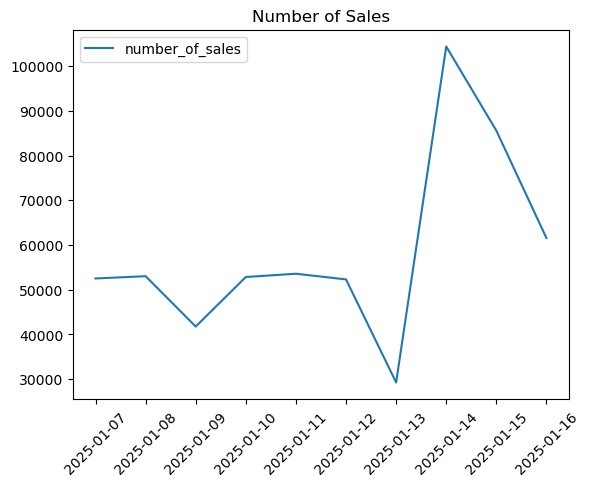

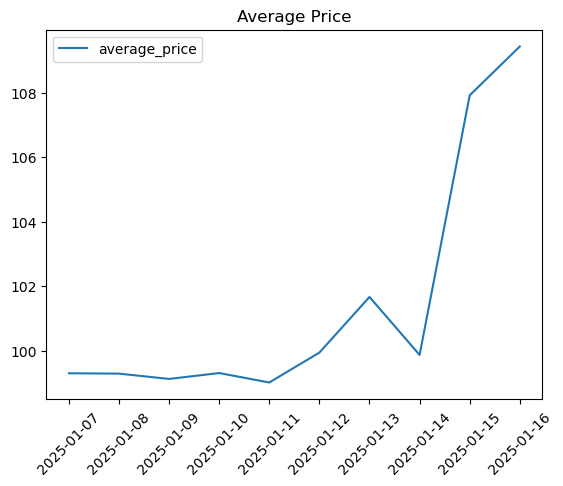

In [178]:
#daily sales
daily_sales = full_data.groupby('date').agg(
    number_of_sales=('order_number', 'count'),
    total_sales=('price', 'sum')
).reset_index()
daily_sales['average_price'] = daily_sales['total_sales'] / daily_sales['number_of_sales']
print(daily_sales)

#line chart / bar + kde
plt.plot(daily_sales['date'], daily_sales['number_of_sales'], label = 'number_of_sales')
plt.xticks(rotation = 45)
plt.legend()
plt.title('Number of Sales')
plt.show()

plt.plot(daily_sales['date'], daily_sales['average_price'], label = 'average_price')
plt.xticks(rotation = 45)
plt.legend()
plt.title('Average Price')
plt.show()


In [51]:
full_data['category'].unique()

array(['sneakers', 'football-shoes', 'outdoor-shoes', 'running-shoes',
       'walking-shoes', 'gym_training-shoes', 'tennis-shoes',
       'us/athletic_sneakers', 'us/soccer-shoes', 'us/hiking-shoes',
       'us/running-shoes', 'us/walking-shoes', 'us/workout-shoes',
       'us/tennis-shoes', 'athletic_sneakers', 'occer-shoes',
       'hiking-shoes'], dtype=object)

         categorized  counts
5            running  172343
6            sneaker  148912
4            outdoor   92095
9            walking   71129
0   athletic_sneaker   40815
8             tennis   20542
2                gym   20257
1           football    9193
7             soccer    6116
3             hiking    2904
10           workout    2480


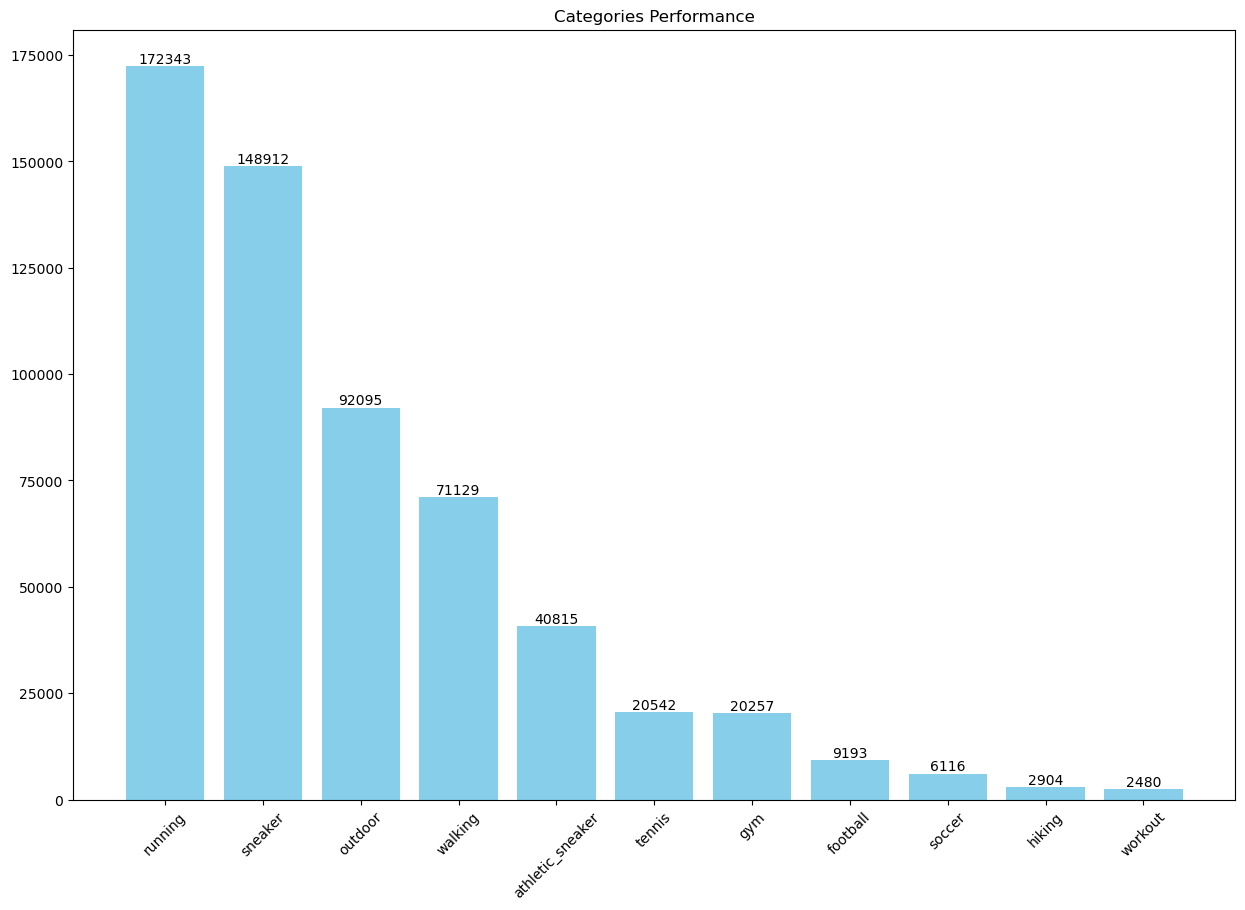

In [229]:
# Create the DataFrame
full_data = pd.DataFrame(full_data)

# Define the categorization function
def categorize(category):
    category = category.lower()  # Normalize to lowercase
    if 'football' in category:
        return 'football'
    elif 'tennis' in category:
        return 'tennis'
    elif 'outdoor' in category:
        return 'outdoor'
    elif 'running' in category:
        return 'running'
    elif 'walking' in category:
        return 'walking'
    elif 'gym' in category:
        return 'gym'
    elif 'soccer' in category:
        return 'soccer'
    elif 'hiking' in category:
        return 'hiking'
    elif 'workout' in category:
        return 'workout'
    elif 'athletic_sneaker' in category:
        return 'athletic_sneaker'
    elif 'sneaker' in category:
        return 'sneaker'
    else:
        return 'other'

# Apply the categorization function to the DataFrame
full_data['categorized'] = full_data['category'].apply(categorize)

# Count occurrences of each category
category_performance = full_data.groupby('categorized').size().reset_index(name='counts')

# Sort by counts in descending order
category_performance = category_performance.sort_values(by='counts', ascending=False)

# Display the results
print(category_performance)


#pir chart/bar chart
plt.figure(figsize = (15,10))
plt.bar(category_performance['categorized'], category_performance['counts'], color='skyblue')

for i, count in enumerate(category_performance['counts']):
    plt.text(i, count, f'{count}', ha = 'center', va = 'bottom')
plt.xticks(rotation = 45)
plt.title('Categories Performance')
plt.show()

In [183]:
full_data



,order_number,id,price,category,size,availability,date,country_code,name,best_for_wear,gender,dominant_color,sub_color1,sub_color2,currency,shoe_metric,categorized
0,63575,HP9426,60.0,sneaker,36,0,2025-01-07,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu,sneaker
1,63575,HP9426,60.0,sneaker,36,0,2025-01-07,DE,Breaknet 2.0 Shoes,City,U,Cloud White,Core Black,Cloud White,euro,eu,sneaker
2,63576,HP9426,60.0,sneaker,36 2/3,0,2025-01-07,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu,sneaker
3,63576,HP9426,60.0,sneaker,36 2/3,0,2025-01-07,DE,Breaknet 2.0 Shoes,City,U,Cloud White,Core Black,Cloud White,euro,eu,sneaker
4,63577,HP9426,60.0,sneaker,37 1/3,0,2025-01-07,DE,Breaknet 2.0 Schuh,City,U,Cloud White,Core Black,Cloud White,euro,eu,sneaker
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
586781,847281,JI4476,160.0,sneaker,49 1/3,2,2025-01-16,BE,Adizero Boston 12 Shoes,Racing,U,Core White,Dark Blue,Pure Ruby,euro,eu,sneaker
586782,847281,JI4476,160.0,sneaker,49 1/3,2,2025-01-16,BE,Adizero Boston 12 Shoes,Race,M,Core White,Dark Blue,Pure Ruby,euro,eu,sneaker
586783,847282,JI4476,160.0,sneaker,50 2/3,0,2025-01-16,BE,Adizero Boston 12 Laufschuh,Racing,U,Core White,Dark Blue,Pure Ruby,euro,eu,sneaker
586784,847282,JI4476,160.0,sneaker,50 2/3,0,2025-01-16,BE,Adizero Boston 12 Shoes,Racing,U,Core White,Dark Blue,Pure Ruby,euro,eu,sneaker


In [57]:
#id performance

sales_performance = full_data.groupby('id')['order_number'].count().reset_index()
sales_performance.columns = ['id', 'sales_volume']

# Sort the sales performance by sales_volume in descending order
sales_performance = sales_performance.sort_values(by='sales_volume', ascending=False)

# Calculate the total sales volume
total_sales_volume = sales_performance['sales_volume'].sum()

# Calculate the outperformer
average_per_sku = round(total_sales_volume/ full_data['id'].nunique(),2)
outperformer = sales_performance.loc[sales_performance['sales_volume'] >= 1500]
outperformer_rate = outperformer.count()/ full_data['id'].nunique() 

# Filter for the abover avgerage 
above_average_product = sales_performance[sales_performance['sales_volume'] > average_per_sku]


# Display the results
print("Total Sales Volume:", total_sales_volume)
print(f'Average sales: {average_per_sku}')
print("Above average product:", above_average_product)
print("Outperformer:", outperformer)
print('Percentage of outperformer:', outperformer_rate)



#Best for?
# Extract the IDs from the outperformer DataFrame
outperformer_ids = outperformer['id']

# Filter full_data to get the best_for_wear for the outperformers
filtered_data = full_data[full_data['id'].isin(outperformer_ids)]

# Group by 'id' and aggregate unique best_for_wear results
result = filtered_data.groupby('id')['best_for_wear'].unique().reset_index()

# Display the results
print(result)

Total Sales Volume: 586786
Average sales: 291.93
Above average product:           id  sales_volume
1146  IF9383          2268
693   IE1054          2268
1890  JI4476          1980
1133  IF9191          1764
1558  IH5685          1764
...      ...           ...
1238  IG4767           300
1237  IG4766           300
1653  IH8231           300
1008  IF4870           300
1919  JP5916           300

[805 rows x 2 columns]
Outperformer:           id  sales_volume
1146  IF9383          2268
693   IE1054          2268
1890  JI4476          1980
1133  IF9191          1764
1558  IH5685          1764
1921  JP7149          1680
Percentage of outperformer: id              0.002985
sales_volume    0.002985
dtype: float64
       id        best_for_wear
0  IE1054       [Racing, Race]
1  IF9191  [Everyday, Walking]
2  IF9383       [Racing, Race]
3  IH5685       [Racing, Race]
4  JI4476       [Racing, Race]
5  JP7149             [Racing]


Market segmentation 

1. gender base analysis

2. country specific trends 


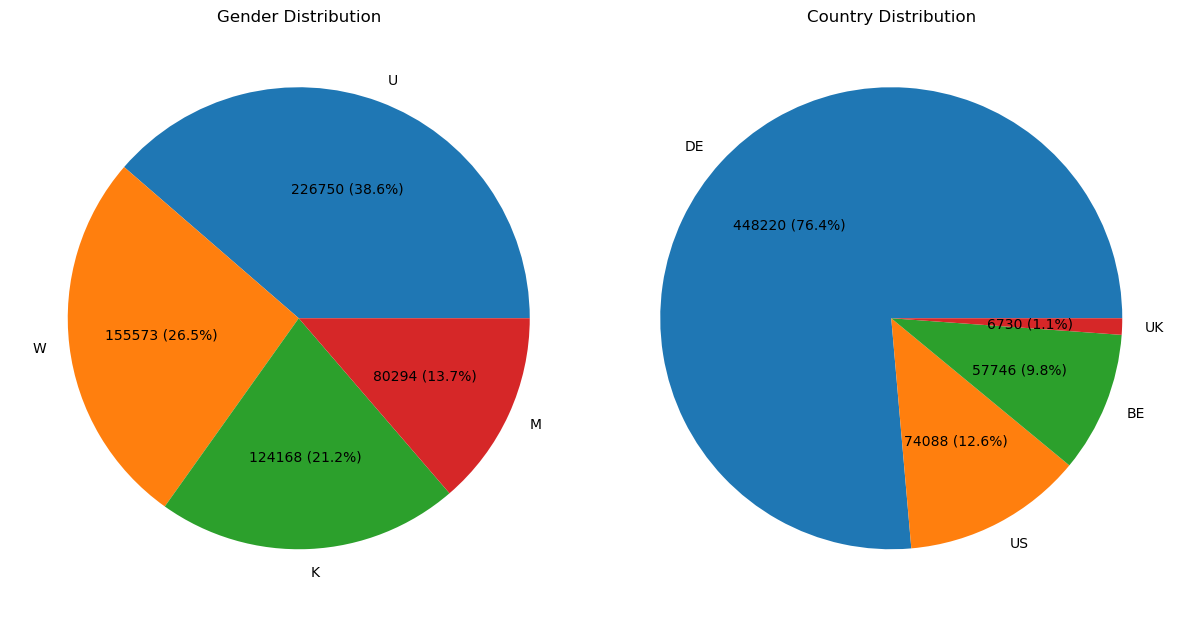

gender            K      M       U       W
country_code                              
BE            14016   6306   22762   14663
DE            98016  53218  174724  122262
UK             3274    429    2338     689
US             8862  20341   26927   17959


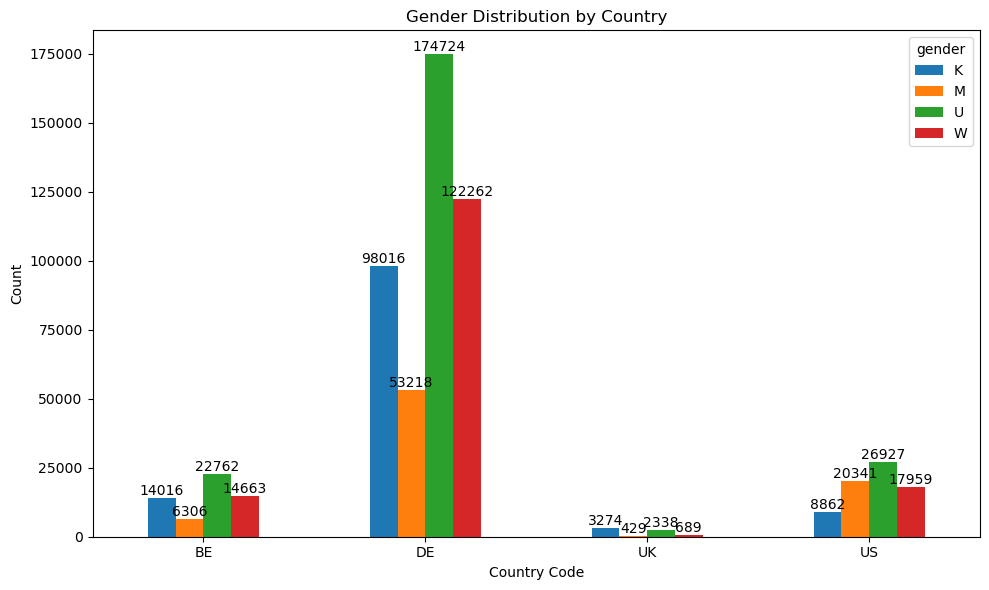

In [61]:
gender_distribution = full_data['gender'].value_counts()
country_distribution = full_data['country_code'].value_counts()


fig, axes = plt.subplots(1, 2, figsize=(12, 8))


axes[0].pie(gender_distribution, labels=gender_distribution.index,
            autopct=lambda p: f'{int(p * sum(gender_distribution) / 100)} ({p:.1f}%)')
axes[0].set_title('Gender Distribution')


axes[1].pie(country_distribution, labels=country_distribution.index,
            autopct=lambda p: f'{int(p * sum(country_distribution) / 100)} ({p:.1f}%)')
axes[1].set_title('Country Distribution')

plt.tight_layout()
plt.show()

# Create a pivot table for gender distribution by country
gender_country = full_data.groupby(['country_code', 'gender']).size().unstack(fill_value=0)  # Convert df to pivot
print(gender_country)

# Calculate the total counts for each country
totals = gender_country.sum(axis=1)

# Plotting
ax = gender_country.plot(kind='bar', figsize=(10, 6))

# Annotate the bars with counts and percentages
for i in ax.patches:
    ax.text(i.get_x() + i.get_width() / 2, i.get_height(), 
            f'{int(i.get_height())}', ha='center', va='bottom')


# Set titles and labels
plt.title('Gender Distribution by Country')
plt.xlabel('Country Code')
plt.ylabel('Count')
plt.xticks(rotation=0)  # Rotate x labels for better readability
plt.tight_layout()  # Adjust layout
plt.show()

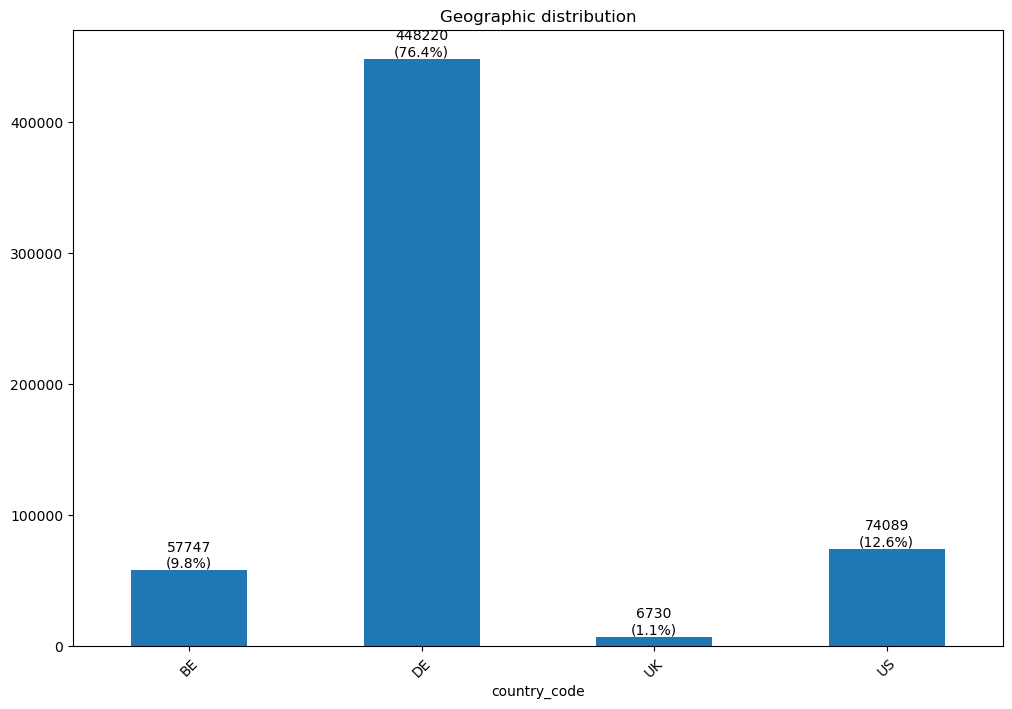

Country Code: DE
category
running     142882
sneaker     123072
outdoor      83061
walking      55612
gym          17727
tennis       17539
football      8327
Name: count, dtype: int64

Country Code: UK
category
sneaker    6730
Name: count, dtype: int64

Country Code: BE
category
sneaker     19110
running     16183
outdoor      9034
walking      7561
gym          2530
tennis       2463
football      866
Name: count, dtype: int64

Country Code: US
category
athletic_sneaker    40815
running             13278
walking              7956
soccer               6116
hiking               2904
workout              2480
tennis                540
Name: count, dtype: int64

dominant_color  Acid Orange  Active Orange  Active Purple  Almost Blue  \
country_code                                                             
BE                        0             24              0            0   
DE                        0            192              0            0   
UK                        0        

In [62]:
'''country specific analysis
preference in category, colour, size '''

geogrpahic_distribution = full_data.groupby('country_code')['order_number'].count()
geogrpahic_distribution.plot(kind='bar', figsize=(12,8), title = 'Geographic distribution')

total = full_data['order_number'].count()
for i, count in enumerate(geogrpahic_distribution):
    percentage = count / total * 100
    plt.text(i,count, f'{count}\n({percentage:.1f}%)', ha = 'center', va = 'bottom')

plt.xticks(rotation = 45)
plt.show()


#category distribution in each geography
country_codes = full_data['country_code'].unique()

result={}
for country in country_codes:
    filtered_data = full_data[full_data['country_code'] == country]
    category_count = filtered_data['category'].value_counts()
    result[country] = category_count

for country, counts in result.items():
    print(f"Country Code: {country}")
    print(counts)
    print()  # For better readability


#colour prefernce in each geography
#alternative for the above loop (pivot table)
pivot_table_colour = pd.pivot_table(full_data, 
                             index='country_code', 
                             columns='dominant_color', 
                             aggfunc='size', 
                             fill_value=0)
print(pivot_table_colour)

pivot_table_size = pd.pivot_table(full_data, 
                             index='country_code', 
                             columns='size', 
                             aggfunc='size', 
                             fill_value=0)
print(pivot_table_size)

Shoes color preference 

In [68]:
color_trends = full_data.groupby('dominant_color')['order_number'].sum().reset_index()
color_trends.sort_values(by = 'order_number', ascending = False)
top_10_color = color_trends.head(10)
print(top_10_color)


  dominant_color  order_number
0    Acid Orange      11854080
1  Active Orange      86812308
2  Active Purple      76465697
3    Almost Blue      13399130
4    Almost Lime      43958739
5    Almost Pink      69282058
6  Almost Yellow     107717190
7        Alumina     549534597
8     Amber Tint     431248194
9     Ash Silver      43966043


Customer behaviour preference 

1. best for wear analysis : feature preference 

best_for_wear
Neutral              233303
Racing                70520
Everyday              36644
City                  30654
Day Hiking            27250
Walking               22741
Comfort               20020
Padel Tennis          14111
Trail Run             13764
Stability             10014
Race                   9892
Staying Dry            8722
Stadium                7537
All Mountain           6660
Off-Court              6404
Rugged Terrain         5098
Trekking               5004
Hiking & Trekking      4638
Workout                4055
Long Distance          3532
Staying Cool           3276
Strength               3224
Pickleball             3124
All-rounder            3028
HIIT                   2838
Dirt / Casual          2800
Train                  2775
On-Court               2573
Outside                2562
Flat Pedal             2400
Staying Warm           2362
Agility                2012
Run                    1963
Fast                   1758
Terrain                1748
Cage  

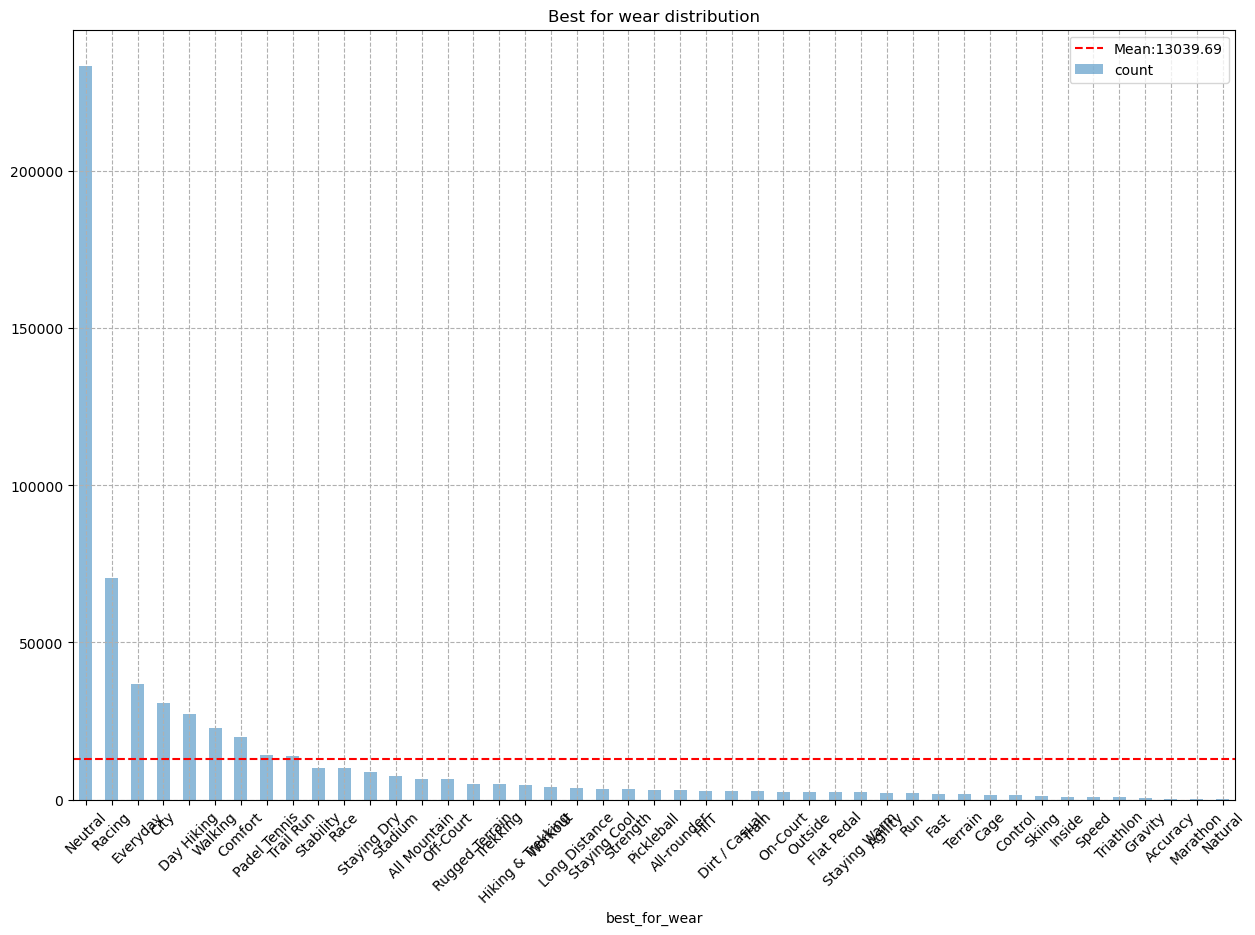

In [139]:
best_for_wear = full_data['best_for_wear'].value_counts()
best_for_wear.sort_values(ascending = False)
print(best_for_wear)

mean = round(full_data['best_for_wear'].value_counts().mean(),2)
print(f'Mean:{mean}')

best_for_wear.plot(kind='bar', alpha =0.5, figsize = (15,10))
plt.axhline(mean, color = 'r', linestyle = '--', label = f'Mean:{mean}')
plt.title('Best for wear distribution')
plt.xticks(rotation = 45)
plt.legend()
plt.grid(linestyle = '--')
plt.show()